<a href="https://colab.research.google.com/github/Devank-Garg/AIML-PROJECTS/blob/main/PRACTICAL_IMPLEMENTATION_OF_Advarsarial_Attack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 9 Advarsarial attack

Problem 1- Load Mobilenet pretrained model from tensorflow library. get some computer image from internet and predict the result using mobilenet model.

In [ ]:
import numpy as np
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions, VGG16
from tensorflow.keras.models import Model



import timeit

import warnings
warnings.filterwarnings('ignore')

SyntaxError: ignored

In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [ ]:
def prepare_image(file):
    img_path = '/content/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

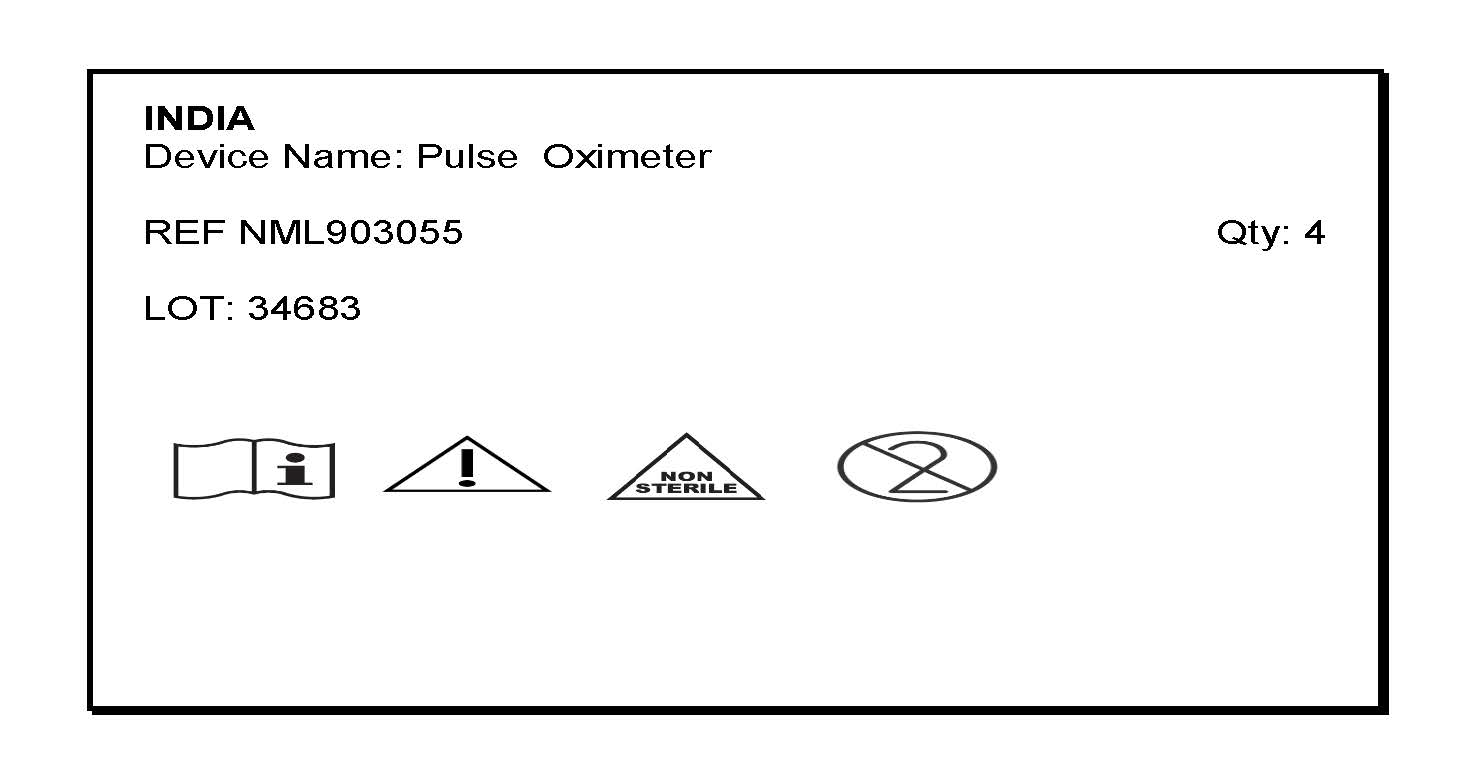

In [ ]:
from IPython.display import Image
Image(filename='/content/result_Page_1.jpg', width=300,height=200) 

In [ ]:
preprocessed_image = prepare_image('result_Page_1.jpg')
predictions = mobile.predict(preprocessed_image)

1/1 [==============================] - 1s 1s/step


In [ ]:
results =tf.keras.applications.imagenet_utils.decode_predictions(predictions)
results

35363/35363 [==============================] - 0s 0us/step


[[('n03291819', 'envelope', 0.83010125),
  ('n06359193', 'web_site', 0.032398056),
  ('n02708093', 'analog_clock', 0.02930124),
  ('n04118776', 'rule', 0.023662318),
  ('n04554684', 'washer', 0.014411219)]]

Problem 2 - Genrate random noise ( [sample code](https://www.kaggle.com/code/chanduanilkumar/adding-and-removing-image-noise-in-python/notebook)) add to your image and apply Noise Attack on the model and observe the results.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
img=cv2.imread("/content/panda.jpg",0)
img=cv2.resize(img,(224,224))
img

array([[ 80,  84,  83, ..., 169, 179, 171],
       [ 77,  81,  96, ..., 180, 177, 172],
       [ 89,  96,  85, ..., 181, 175, 171],
       ...,
       [118, 107,  89, ..., 170, 163, 162],
       [ 84, 126,  62, ..., 140, 141, 137],
       [101,  65,  70, ..., 151, 158, 148]], dtype=uint8)

In [ ]:
print(img.shape)

(224, 224)


In [ ]:
uni_noise=np.zeros((224,224),dtype=np.uint8)
cv2.randu(uni_noise,0,255)
uni_noise=(uni_noise*0.5).astype(np.uint8)

In [ ]:
un_img=cv2.add(img,uni_noise)

Text(0.5, 1.0, 'Combined')

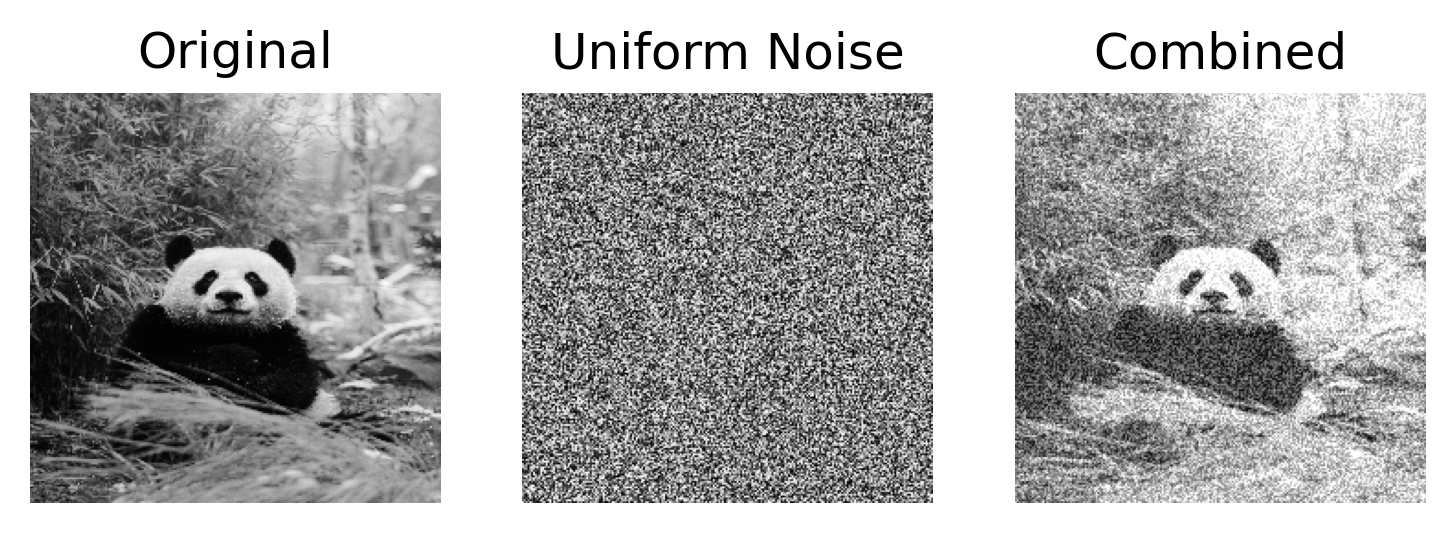

In [ ]:
fig=plt.figure(dpi=300)

fig.add_subplot(1,3,1)
plt.imshow(img,cmap='gray')
plt.axis("off")
plt.title("Original")

fig.add_subplot(1,3,2)
plt.imshow(uni_noise,cmap='gray')
plt.axis("off")
plt.title("Uniform Noise")

fig.add_subplot(1,3,3)
plt.imshow(un_img,cmap='gray')
plt.axis("off")
plt.title("Combined")

In [ ]:
cv2.imwrite('/content/panda1.jpg',un_img)

True

In [ ]:
preprocessed_image = prepare_image('panda1.jpg')
predictions = mobile.predict(preprocessed_image)

1/1 [==============================] - 0s 64ms/step


In [ ]:
results = imagenet_utils.decode_predictions(predictions)
results

[[('n03223299', 'doormat', 0.63218576),
  ('n02086079', 'Pekinese', 0.14175746),
  ('n02510455', 'giant_panda', 0.036542963),
  ('n02447366', 'badger', 0.029604627),
  ('n04347754', 'submarine', 0.027205104)]]

In [ ]:
#ORIGINAL PREDICTION : GIANT PANDA
#AFTER ADDING THE NOISE : DOORMAT (LOL)

Problem 3 - Apply Semantic Attack on the model and observe the result. 

In [ ]:
img3=cv2.imread("/content/panda.jpg",0)

In [ ]:
img3

array([[ 65,  81,  71, ..., 170, 171, 172],
       [ 60,  72,  73, ..., 166, 167, 168],
       [ 74,  73,  78, ..., 169, 169, 168],
       ...,
       [ 58,  59,  63, ..., 164, 164, 163],
       [ 55,  61,  63, ..., 164, 163, 161],
       [ 64,  55,  49, ..., 165, 163, 160]], dtype=uint8)

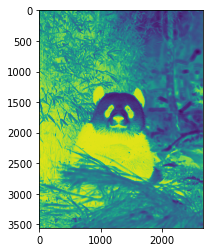

In [ ]:
inverted_image = cv2.bitwise_not(img3)
plt.imshow(inverted_image)

In [ ]:
cv2.imwrite('/content/panda2.jpg',inverted_image)
img4=cv2.imread("/content/panda2.jpg",0)
img4=cv2.resize(img4,(224,224))

TypeError: ignored

In [ ]:
preprocessed_image = prepare_image('panda2.jpg')
predictions = mobile.predict(preprocessed_image)

1/1 [==============================] - 0s 78ms/step


In [ ]:
results = imagenet_utils.decode_predictions(predictions)
results

[[('n02447366', 'badger', 0.22749348),
  ('n02500267', 'indri', 0.21563211),
  ('n02445715', 'skunk', 0.19584419),
  ('n02110063', 'malamute', 0.05039845),
  ('n04229816', 'ski_mask', 0.038077228)]]

In [ ]:
#ORIGINAL PREDICTION : GIANT PANDA
#AFTER ADDING THE NOISE : DOORMAT (LOL)
#AFTER INVERTING THE IMAGE: BADGER (🤣)